# Importing Frontier and dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/Users/neilnatarajan/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
from selectionpossibilityfrontier import return_frontier, plot_frontier, make_proportional_targets, make_combined_targets, apply_target

# Testing Frontier

First, we generate some dummy data.

In [4]:
# Create some Dummy data to use in our testing
total_size = 2000
select_size = 500
proportion_female = 0.5
proportion_white = 0.8
proportion_low_ses = 0.4

In [5]:
female = (np.random.rand(total_size) < proportion_female).astype(int)
male = 1 - female

white = (np.random.rand(total_size) < proportion_white).astype(int)
bipoc = 1 - white

low_ses = (np.random.rand(total_size) < proportion_low_ses).astype(int)

score = np.random.rand(total_size)

In [6]:
user_level = pd.DataFrame([male, female, white, bipoc, low_ses, score]).transpose()
user_level.columns = ['Male', 'Female', 'White', 'BIPOC', 'Low_SES', 'Score']

In [7]:
categories = user_level.drop('Score', axis=1).values.astype(float)
scores = user_level['Score'].values.astype(float)

weights = np.ones(categories.shape[1])
proportions = np.array([.5, .5, 0.0, .4, .8])

Then, we use SPF functionality to plot a frontier

In [8]:
divfunc, dfmax = make_proportional_targets(select_size, proportions, weights)

In [9]:
ds, qs, cs = return_frontier(categories, scores, select_size, divfunc, dfmax, ext=True)

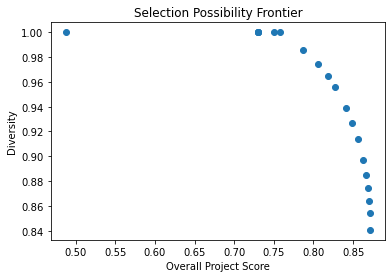

In [10]:
plot_frontier(ds, qs, qlabel='Overall Project Score', lims=False)

In [12]:
apply_target(divfunc, categories[cs[0]])

65.76491222541475

In [13]:
apply_target(divfunc, categories[cs[0]], scale=True, tfmax = dfmax)

1.0